## Asignación de Recursos Financieros Productores de Caña MX

### Descripción del Problema:
Durante el último año diversos Productores de Caña en México se han enfrentado a *dificultades de productividad*, debidas principalmente a condiciones climáticas atípicas y escasez de agua. Para mitigar el impacto de esta variabilidad se hace necesaria la asignación de recursos financieros, con el objetivo de garantizar la cantidad de caña que requiere la operación de los ingenios.

Esta asignación se plantea como un **problema de optimización de recursos financieros** (propios o de entidades) que permita asegurar la producción de caña requerida por los Ingenios, sujeta a un presupuesto finito y a la capacidad de re-pago de los productores.

Se formula un ***Problema de Optimización Lineal*** con los siguientes parámetros:

- **Elegibilidad (0-1)**: Este parámetro indicará si un Productor de Caña específico *califica* para una ayuda financiera basado en distintos criterios, tales como productividad mínima, monto máximo a financiar, interés en seguir produciendo caña, etc.
- **Beneficio (USD)**: Este parámetro estima el beneficio que PSA (o las entidades financieras) obtiene(n) al final de cada año por financiar a un productor de caña específico, que incluye tanto el re-pago del monto asignado más intereses, como también los beneficios estimados relacionados a la productividad esperada de sus terrenos destinados a siembra de caña.
- **Monto a Financiar (USD)**: Magnitud de la ayuda financiera que el productor requiere.
- **Área Efectiva (ha)**: Se refiere al área efectiva de caña que se proyecta para los terrenos del productor destinados a siembra de caña.
- **Rendimiento de Caña (t Caña/ ha)**: Parámetro de productividad de caña por unidad de área efectiva.
- **Presupuesto (USD)**: Monto total anual de ayuda a asignar, durante el horizonte de tiempo total.
- **Total de Caña (t Caña)**: Cantidad total de caña anual requerida de los productores en necesidad de ayuda financiera.
- **Pérdida Financiera Esperada (USD)**: Estimación estadística del promedio de pérdidas de la cartera, que se esperaría perder en caso de incumplimiento de pago por parte de los productores. Esta cantidad sigue la siguiente ecuación:

$$Perdida_{esperada} = Exposición_{impago} * Pérdida_{impago} * Riesgo_{impago}$$


- **Exposición al Momento de Impago (USD)**: Monto total de la ayuda asignada al productor. En este caso igual al Monto a Financiar.
- **Pérdida dado el Impago (%)**: Fracción de pérdida respecto al monto total en la que se incurriría en caso de impago.
- **Riesgo de Impago (%)**: Probabilidad de un productor de caña de no cumplir con los compromisos de pago.

### Formulación del Problema de Optimización

#### Conjuntos y Notaciones:

Sean:
- $I$ el conjunto de Productores de Caña, con $i$ el i-ésimo productor de caña, $i \in \{1,2,...,n\}$.
- $J$ el conjunto de Años en el Horizonte de Análisis, con $j$ el j-ésimo año en el horizonte, $j \in \{1,2,...,m\}$.

#### Parámetros:
- $E_{i} \in \{0,1\}, \forall i \in \{1,2,...,n\} $ la Elegibilidad a Financiamiento del i-ésimo Productor de Caña.
- $B_{i,j} \in \mathbb{R}, \forall i \in \{1,2,...,n\}, \forall j \in \{1,2,...,m\}$ el Beneficio Estimado (NPV) por Financiar al Productor $i$ en el año $j$.
- $F_{i,j} \in \mathbb{R}, \forall i \in \{1,2,...,n\}$ el Financiamiento Requerido por el i-ésimo Productor de Caña.
- $A_{i,j} \in \mathbb{R}, \forall i \in \{1,2,...,n\}, \forall j \in \{1,2,...,m\}$ el Área Efectiva de Caña del Productor $i$ en el año $j$.
- $C_{i,j} \in \mathbb{R}, \forall i \in \{1,2,...,n\}, \forall j \in \{1,2,...,m\}$ el Rendimiento Ponderado de Caña (TCH) del Productor $i$ en el año $j$.
- $P_{i,j} \in \mathbb{R}, \forall i \in \{1,2,...,n\}$, la Pérdida Esperada de cada productor $i$, por riesgo de impago en el año $j$
- $L_{i,j} \in [0,1], \forall i \in \{1,2,...,n\}$, la Pérdida Financiera dado el impago del Productor de Caña $i$ en el año $j$
- $R_{i,j} \in [0,1], \forall i \in \{1,2,...,n\}$, el Riesgo de Impago del Productor de Caña $i$ en el año $j$

#### Variables de Decisión:
- $X_i \in \{0,1\}, \forall i \in \{1,2,...,n\}$ la variable que indica la decisión de financiar al i-ésimo Productor de Caña en todo el horizonte de análisis.

#### Función Objetivo Beneficio Financiación Productores MX

$$\max\limits_{\forall i \in I, \forall j \in J} \sum_{i=1}^{n}\sum_{j=1}^{m} X_{i}*E_{i}*B_{ij} - \sum_{i=1}^{n}\sum_{j=1}^{m} P_{ij}*X_{i}$$

Donde:
$$ P_{i,j} = F_{i,j}*L_{ij}*R_{ij}, \forall i \in I, \forall j \in J $$

#### Restricciones

Presupuesto Anual para Financiamiento:

- $\sum_{i=1}^{n} X_{i}*F_{i,j} \leq Budget_{j}; \forall j \in J$

Demanda Anual de Caña:

- $\sum_{i=1}^{n} X_i*A_{i,j}*C_{i,j} + Caña_{Propia} + Caña_{Productores Seguros} \geq CañaMinima_{j};  \forall j \in J$

- $\sum_{i=1}^{n} X_i*A_{i,j}*C_{i,j} + Caña_{Propia} + Caña_{Productores Seguros} \leq CañaMaxima_{j};  \forall j \in J$

No-Negatividad del Beneficio:

- $\sum_{i=1}^{n}\sum_{j=1}^{m} X_{i}*E_{i}*B_{ij} \geq 0$

Tolerancia Máxima al Riesgo de Incumplimiento (Probabilidad de Impago):

- $R_{i,j} \leq R_{MAX}, \forall i \in \{1,2,...,n\}, \forall j \in J$

Monto de Financiamiento Máximo a Productor Individual:

- $F_{i,j} \leq F_{MAX}, \forall i \in \{1,2,...,n\}, \forall j \in \{1,2,...,m\}$

Variables de Decisión:

- $X_i \in \{0,1\}, \forall i \in \{1,2,...,n\}$

In [1]:
!pip install gurobipy

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# librería de optimización
import gurobipy as grb

from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv(r'drive/MyDrive/Colab Notebooks/MX/ProductoresMX_1Years-Copy1.csv')
df.head()

,ID,Elegibilidad,Beneficio_Year1,Financiamiento_Year1,Area_Year1,Rendimiento_Year1,Probabilidad_Impago_Year1,Perdida_Impago_Year1
0,1,0,401.084772,69282.256320,31.647425,91.376103,0.207095,0.039554
1,2,1,13564.632850,42239.396880,47.291438,65.648293,0.099122,0.046071
2,3,1,5265.660355,5652.194208,29.812790,92.229906,0.153742,0.207570
3,4,0,16616.681560,24553.164720,54.831072,83.661621,0.063910,0.031327
4,5,0,60761.513750,41358.659810,45.141183,68.472908,0.015251,0.526427


#### Parámetros de Optimización

In [13]:
## productores
Producers = np.array(df)

# número de productores
n = len(df['ID'])

# número de años
a = 1

# lista de productores
I = {i for i in range(1,n+1)}

# lista de años
J = {j for j in range(1,a+1)}

# parámetros
BUDGET = [1000000]
CANA_MIN = [300000]
CANA_MAX = [500000]
RISK = 0.2
FUNDING = 500000

E = {i:Producers[i-1,1] for i in I}
B = {(i,j):Producers[i-1,6*(j-1)+2] for i in I for j in J}
F = {(i,j):Producers[i-1,6*(j-1)+3] for i in I for j in J}
A = {(i,j):Producers[i-1,6*(j-1)+4] for i in I for j in J}
C = {(i,j):Producers[i-1,6*(j-1)+5] for i in I for j in J}
R = {(i,j):Producers[i-1,6*(j-1)+6] for i in I for j in J}
L = {(i,j):Producers[i-1,6*(j-1)+7] for i in I for j in J}

#### Modelo de Optimización

In [14]:
# modelo de optimización
model = grb.Model("Seleccion de Productores")

# variables de decisión
x = model.addVars(I, vtype = grb.GRB.BINARY)

#### Función Objetivo

In [15]:
# función objetivo
model.setObjective(grb.quicksum(E[i]*B[(i,j)]*x[i] - F[(i,j)]*L[(i,j)]*R[(i,j)]*x[i] for i in I for j in J), grb.GRB.MAXIMIZE)

#### Restricciones

In [16]:
# restricciones
model.addConstrs((grb.quicksum(F[(i,j)]*x[i] for i in I) <= BUDGET[j-1] for j in J), name = "Financiamiento Anual Maximo")
model.addConstrs((grb.quicksum(C[(i,j)]*A[(i,j)]*x[i] for i in I) >= CANA_MIN[j-1] for j in J), name = "Demanda Minima Anual de Caña")
model.addConstrs((grb.quicksum(C[(i,j)]*A[(i,j)]*x[i] for i in I) <= CANA_MAX[j-1] for j in J), name = "Demanda Maxima Anual de Caña")
model.addConstr((grb.quicksum(E[i]*B[(i,j)]*x[i] for i in I for j in J) >= 0), name = "No-Negatividad del Beneficio Financiero")
model.addConstrs((R[(i,j)]*x[i] <= RISK for i in I for j in J), name = "Tolerancia al Riesgo de Incumplimiento")
model.addConstrs((F[(i,j)]*x[i] <= FUNDING for i in I for j in J), name = "Financiamiento Individual Maximo")

model.update()

### Solución al Problema de Optimización de Programación Entera-Mixta (MIP)

In [17]:
# optimización
model.optimize()

if model.status != grb.GRB.status.OPTIMAL:
    print("No se encontró una solución factible...")
else:
    print("El valor optimo de la función objetivo es %g"%model.objVal)
    resultado_objetivo = model.objVal
    resultado_seleccion_productores = [i for i in I if x[i].X >= 1]

    df_salida = pd.DataFrame({"valor función objetivo": [resultado_objetivo],
                              "productores seleccionados": [resultado_seleccion_productores]})

Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 604 rows, 300 columns and 1662 nonzeros
Model fingerprint: 0xdffce432
Variable types: 0 continuous, 300 integer (300 binary)
Coefficient statistics:
  Matrix range     [1e-03, 7e+04]
  Objective range  [3e+00, 6e+04]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e-01, 1e+06]
Presolve removed 601 rows and 68 columns
Presolve time: 0.01s
Presolved: 3 rows, 232 columns, 586 nonzeros
Variable types: 0 continuous, 232 integer (232 binary)

Root relaxation: objective 2.629055e+06, 4 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 2629055.15    0    2          - 2629055.15  

In [18]:
df_salida

,valor función objetivo,productores seleccionados
0,2.627212e+06,"[3, 6, 8, 9, 10, 11, 13, 14, 22, 33, 34, 45, 5..."


#### Análisis de Resultados

In [28]:
productores = df_salida['productores seleccionados'][0]
df_final = df.loc[df['ID'].isin(productores)].reset_index()
df_final.drop('index', axis=1, inplace=True)
df_final.head()

,ID,Elegibilidad,Beneficio_Year1,Financiamiento_Year1,Area_Year1,Rendimiento_Year1,Probabilidad_Impago_Year1,Perdida_Impago_Year1
0,3,1,5265.660355,5652.194208,29.812790,92.229906,0.153742,0.207570
1,6,0,11949.724000,3589.087210,46.937922,120.621986,0.071403,0.191458
2,8,1,51219.330740,9154.797689,27.338641,130.915630,0.162641,0.659873
3,9,1,63535.703220,15705.382990,44.359550,66.802439,0.169081,0.417228
4,10,1,56006.016730,15951.725250,50.953842,86.642773,0.049794,0.228846


Text(0.5, 1.0, 'Financing Year 1 (USD)')

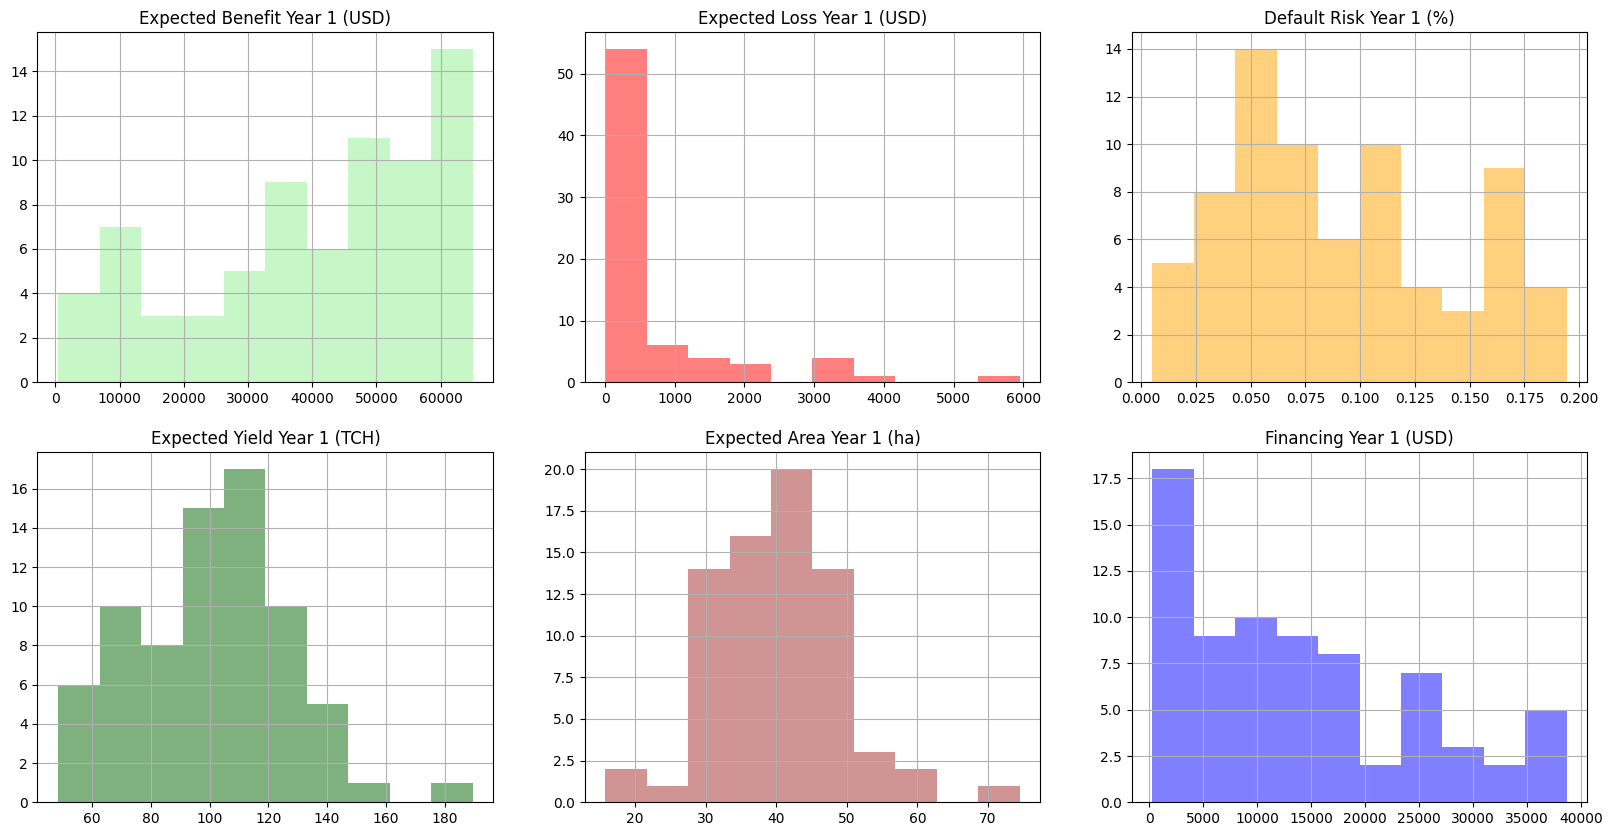

In [58]:
df_final['Perdida_Esperada_Year1'] = df_final['Financiamiento_Year1']*df_final['Perdida_Impago_Year1']*df_final['Probabilidad_Impago_Year1']

fig, ax = plt.subplots(2, 3, figsize=(20, 10))

df_final['Beneficio_Year1'].hist(ax=ax[0,0],alpha=0.5,color='lightgreen')
ax[0,0].set_title('Expected Benefit Year 1 (USD)')

df_final['Perdida_Esperada_Year1'].hist(ax=ax[0,1],alpha=0.5,color='red')
ax[0,1].set_title('Expected Loss Year 1 (USD)')

df_final['Probabilidad_Impago_Year1'].hist(ax=ax[0,2],alpha=0.5,color='orange')
ax[0,2].set_title('Default Risk Year 1 (%)')

df_final['Rendimiento_Year1'].hist(ax=ax[1,0],alpha=0.5,color='darkgreen')
ax[1,0].set_title('Expected Yield Year 1 (TCH)')

df_final['Area_Year1'].hist(ax=ax[1,1],alpha=0.5,color='brown')
ax[1,1].set_title('Expected Area Year 1 (ha)')

df_final['Financiamiento_Year1'].hist(ax=ax[1,2],alpha=0.5,color='blue')
ax[1,2].set_title('Financing Year 1 (USD)')


In [27]:
print("============================== RESTRICCIONES =============================")
print("")
print("Dados los siguientes parámetros:")
print("Presupuesto Máximo Anual para Financiar (USD):",BUDGET)
print("Monto Máximo Individual de Financimiento por Productor (USD):",FUNDING)
print("Demanda Mínima Anual de Caña (t):",CANA_MIN)
print("Demanda Máxima Anual de Caña (t):",CANA_MAX)
print("Probabilidad Máxima de Impago tolerada (%):",RISK*100)
print("")
print("=========================== RESUMEN GLOBAL DE RESULTADOS ===========================")
print("")
print("Se han seleccionado: %0.2f de %0.2f productores de caña" % (len(df_final['ID']), n))
print("El beneficio estimado total en %0.2f años es de USD %0.2f" % (a,sum(df_final['Beneficio_Year1'])))
print("El financiamiento total en %0.2f años es de USD: %0.2f" % (a,sum(df_final['Financiamiento_Year1'])))
print("La pérdida esperada total en %0.2f años es de USD: %0.2f" % (a,sum(df_final['Financiamiento_Year1']*df_final['Perdida_Impago_Year1']*df_final['Probabilidad_Impago_Year1'])))
print("El suministro de caña total en %0.2f años es de %0.2f toneladas" % (a,sum(df_final['Area_Year1']*df_final['Rendimiento_Year1'])))
print("")
print("========================= RESUMEN INDIVIDUAL DE RESULTADOS =========================")
print("")
print("El monto máximo asignado a productores de caña individuales es de (USD) %0.2f" % (np.max(df_final['Financiamiento_Year1'])))
print("El monto medio asignado a productores de caña individuales es de (USD) %0.2f" % (np.mean(df_final['Financiamiento_Year1'])))
print("El riesgo máximo observado de impago de productores de caña individuales es del %0.2f porciento" % (np.max(df_final['Probabilidad_Impago_Year1'])*100))
print("El riesgo medio observado de impago de productores de caña individuales es del %0.2f porciento" % (np.mean(df_final['Probabilidad_Impago_Year1'])*100))
print("")
print("====================================================================================")
print("")
print("Los productores seleccionados son:",productores)

============================== RESTRICCIONES =============================

Dados los siguientes parámetros:
Presupuesto Máximo Anual para Financiar (USD): [1000000]
Monto Máximo Individual de Financimiento por Productor (USD): 500000
Demanda Mínima Anual de Caña (t): [300000]
Demanda Máxima Anual de Caña (t): [500000]
Probabilidad Máxima de Impago tolerada (%): 20.0

=========================== RESUMEN GLOBAL DE RESULTADOS ===========================

Se han seleccionado: 73.00 de 300.00 productores de caña
El beneficio estimado total en 1.00 años es de USD 2973080.71
El financiamiento total en 1.00 años es de USD: 999345.14
La pérdida esperada total en 1.00 años es de USD: 51529.47
El suministro de caña total en 1.00 años es de 300060.44 toneladas

========================= RESUMEN INDIVIDUAL DE RESULTADOS =========================

El monto máximo asignado a productores de caña individuales es de (USD) 38704.34
El monto medio asignado a productores de caña individuales es de (USD) 1